## CSCI451 Project ( Car License Detection )
#### By:
* Reem Abdelazim Mohamed - 19100671
* Wafaa Mohsen Tawfek - 19100976
* Gehad Ahmed Mostafa - 19104543
* Sohaila Hussien Yehia - 19104679

#### Presented to:
* Dr. Mustafa Ahmed Al Attar 
* Eng. Zeyad Ezzat Abdullah

## Table Of Contents:
* [1- Resizing and converting to greyscale](#1)
* [2 - Bilateral Filter For Noise Reduction](#2)
* [3- Algorithms](#3)
* [3.1- Trying Canny Edge Detection Algorithm](#4)
* [3.2- Trying Sobel Detection Algorithm](#5)
* [4- Thresholding ](#6)
* [5- FloodFilling](#7)
* [6- Contouring Our Image](#8)
* [7- OCR ](#9)


## Libraries Imported:

In [112]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.filters import threshold_otsu
from skimage.transform import rescale, resize
import cv2
import pytesseract as tess
from PIL import Image
import numpy as np

## 1- Resizing and converting to greyscale  <a class="anchor" id="1"></a>

In [114]:
from IPython.display import Image

img= cv2.imread('22.png',cv2.IMREAD_GRAYSCALE)
width= 594
height= 453
dimension= (width,height)
FirstTry= cv2.resize(img, dimension, interpolation = cv2.INTER_AREA)
h, w = FirstTry.shape

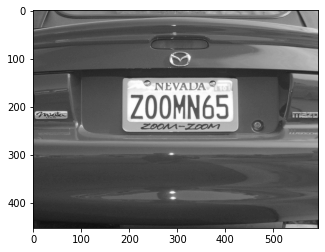

In [115]:
plt.imshow(FirstTry,'gray',vmin=0, vmax=255)

## 2 - Bilateral Filter For Noise Reduction <a class="anchor" id="2"></a>

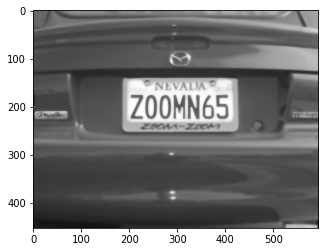

In [116]:
bilateral_blur= cv2.bilateralFilter(FirstTry,9,75,75)
plt.imshow(bilateral_blur,'gray',vmin=0, vmax=255)

# 3- Algorithms : <a class="anchor" id="3"></a>

## 3.1- Trying Canny Edge Detection Algorithm <a class="anchor" id="4"></a>

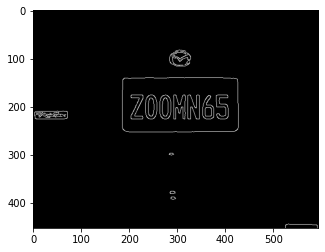

In [117]:
canny_trial = cv2.Canny(bilateral_blur,0,450) #kernel size one
canny_trial = np.uint8(np.absolute(canny_trial))
plt.imshow(canny_trial,'gray',vmin=0, vmax=255)

## 3.2- Trying Sobel Detection Algorithm <a class="anchor" id="5"></a>

In [118]:
sobelX_trial = cv2.Sobel(bilateral_blur,cv2.CV_64F, 1, 0, ksize=1) #derivative using X axis
sobelY_trial = cv2.Sobel(bilateral_blur,cv2.CV_64F, 0, 1, ksize=1) #derivative using X axis

sobelX_trial = np.uint8(np.absolute(sobelX_trial))
sobelY_trial = np.uint8(np.absolute(sobelY_trial))

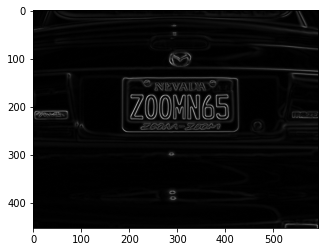

In [119]:
#sobel XY
sobelXY = cv2.addWeighted(sobelX_trial,1,sobelY_trial,1,0)
sobelXY = np.uint8(np.absolute(sobelXY))
plt.imshow(sobelXY,'gray',vmin=0, vmax=255)

## 4- Thresholding  <a class="anchor" id="6"></a>

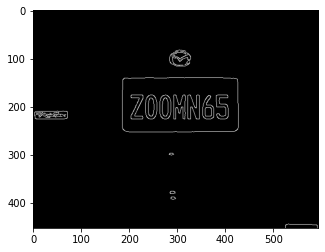

In [120]:
ret,thresh = cv2.threshold(canny_trial,0,255,cv2.THRESH_BINARY)
plt.imshow(thresh,'gray',vmin=0, vmax=255)

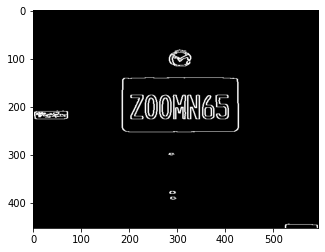

In [121]:
kernel = np.ones((1,3),np.uint8)
Dilation = cv2.dilate(thresh,kernel,iterations = 1)
plt.imshow(Dilation,'gray',vmin=0, vmax=255)


## 5- FloodFilling <a class="anchor" id="7"></a>

In [122]:
# Using the Thresholding image
DilatedFloodFilled = Dilation.copy()

# Mask used to flood filling.
# The size needs to be 2 pixels larger than the image.
h_h, w_w = Dilation.shape[:2]
FloodFilling_Mask = np.zeros((h_h+2, w_w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(DilatedFloodFilled, FloodFilling_Mask, (0,0), 255)

# Invert floodfilled image
DilatedFloodFilled_Inverted = cv2.bitwise_not(DilatedFloodFilled)

# Combine the two images to get the foreground.
dilate_out = Dilation | DilatedFloodFilled_Inverted



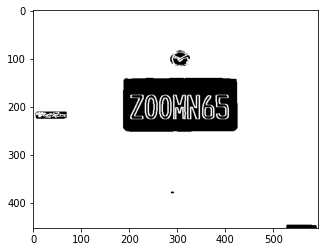

In [123]:
plt.imshow(DilatedFloodFilled,'gray',vmin=0, vmax=255)

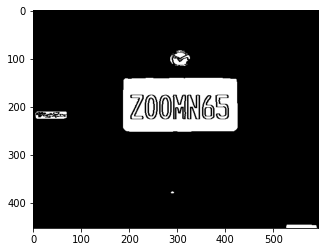

In [124]:
plt.imshow(DilatedFloodFilled_Inverted,'gray',vmin=0, vmax=255)

# median 

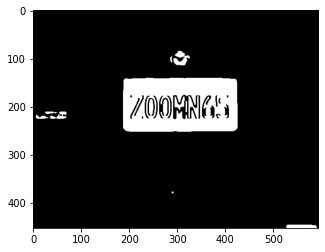

In [125]:
blur = cv2.medianBlur(DilatedFloodFilled_Inverted,5)
plt.imshow(blur,'gray',vmin=0, vmax=255)

In [126]:
from PIL import Image
import numpy as np


## 6- Contouring Our Image  <a class="anchor" id="8"></a>

359.0
7.5
93.0
212.5
61.0
25924.5
((305.5, 196.5), (111.0, 237.0), 90.0)
187 141 238 112


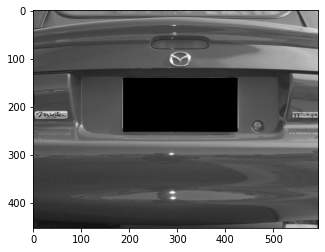

In [127]:
def ImageContouring(img,imgcontour):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    plate_img=[]
    
    for cnt in contours:
        
        area = cv2.contourArea(cnt)
        print(area)

        
        if  area > 1400 :
            min_rect = cv2.minAreaRect(cnt)
            print(min_rect)
            x_x,y_y,w_w,h_h = cv2.boundingRect(cnt)
            print(x_x,y_y,w_w,h_h)
            return x_x,y_y,w_w,h_h

test = FirstTry
test_copy = test.copy()
x_x,y_y,w_w,h_h=ImageContouring(blur,test_copy)
test_copy[y_y:y_y+h_h,x_x:x_x+w_w]=0
plt.imshow(test_copy,'gray')


In [128]:
from PIL import Image
import numpy as np

## 7- Optical Character Recognition (OCR) <a class="anchor" id="9"></a>

In [141]:

def OCR(x_x,y_y,w_w,h_h,org_img):
    print(x_x,y_y,w_w,h_h)
    plate_img = org_img[y_y:y_y+h_h,x_x:x_x+w_w]
    plate_im = Image.fromarray(plate_img)

    text = tess.image_to_string(plate_img, lang='eng')
    plt.imshow(plate_img,'gray')
    return text


In [146]:
from PIL import Image
import pytesseract
from pytesseract import Output

#text = OCR(x_x,y_y,w_w,h_h,test)

#OCR(x_x,y_y,w_w,h_h,test)

In [144]:
def OCR_Image(text,org_img):
    
    text=OCR(x_x,y_y,w_w,h_h,test)
    font = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (x_x,y_y-10)
    fontScale = 1
    fontColor = (240,68,83)
    lineType = 2

    img = cv2.rectangle(org_img,(x_x,y_y),(x_x+w_w,y_y+h_h),(255,255,255),4)
    cv2.putText(org_img,text,
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)
    plt.imshow(img, 'gray')
    

In [145]:
OCR_Image((text),test)

NameError: ignored